<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/scatterint_monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
* Simulate electrons interacting with a solid, using the treament of Joy, 1995

# Resources
* Joy, D. C. (1995). Monte Carlo Modeling for Electron Microscopy and Microanalysis. Oxford University Press.

# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
from scipy import ndimage
def doplt(arr2d):
  plt.imshow(arr2d,cmap='gray')

# 2D Random Walk
* with each step moving by a random angle
* Steps in real space (not on lattice)

## classical random walk

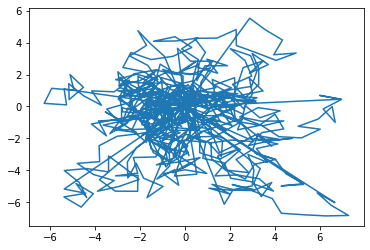

In [ ]:

x,y=0,0
theta=0
CX,CY = np.cos(theta), np.cos(np.pi-theta)
step_size=1
n_steps=25
n_sims=25
walk = np.zeros((n_sims,n_steps+1,2))

for sim in range(n_sims):
  x,y=0,0
  theta = 2*np.pi*np.random.uniform(low=0,high=1)
  for step in range(n_steps+1):
    walk[sim,step,:] = x,y
    theta = 2*np.pi*np.random.uniform(low=0,high=1)
    CA,CB = np.cos(theta), np.sin(theta)
    xn = x+step_size*CA
    yn = y+step_size*CB
    x,y = xn,yn

plt.plot(walk[:,:,0].flatten(),walk[:,:,1].flatten())


## a la Joy
* Chapter 2 "Constructing a Simulation" in Joy, 1995

x,y 0 0
theta 197.57286141383693
xn,yn 0.3019183707656914 -0.9533337806844939
CX,CY 6.123233995736766e-17 1.0
CA,CB 0.3019183707656914 -0.9533337806844939
x,y 0.3019183707656914 -0.9533337806844939
theta 257.468171894071
xn,yn 1.1670287410073297 -1.0412029421172193
CX,CY 0.3019183707656914 -0.9533337806844939
CA,CB 0.8651103702416383 -0.0878691614327253
x,y 1.1670287410073297 -1.0412029421172193
theta 216.99481538579178
xn,yn 0.7778968308926522 -1.5704379518530933
CX,CY 0.8651103702416383 -0.0878691614327253
CA,CB -0.38913191011467757 -0.5292350097358739
x,y 0.7778968308926522 -1.5704379518530933
theta 196.1579458788829
xn,yn 1.4080095735313525 -1.2982276318729085
CX,CY -0.38913191011467757 -0.5292350097358739
CA,CB 0.6301127426387004 0.27221031998018475


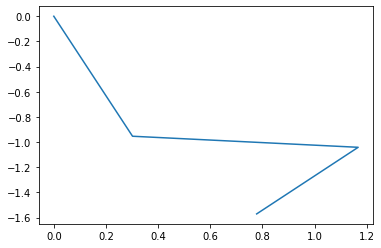

In [ ]:

x,y=0,0
theta=0
CX,CY = np.cos(theta), np.cos(np.pi-theta)
step_size=1
n_steps=3
n_sims=1
walk = np.zeros((n_sims,n_steps+1,2))
np.random.seed(0)

for sim in range(n_sims):
  x,y=0,0
  theta = np.pi/2 #2*np.pi*np.random.uniform(low=0,high=1)

  # print('x0,y0',x,y)
  # print('theta0',180*theta/np.pi)

  CX,CY = np.cos(theta), np.cos(np.pi/2-theta)
  for step in range(n_steps+1):
    
    
    walk[sim,step,:] = x,y
    theta = 2*np.pi*np.random.uniform(low=0,high=1)
    if False:
      V1 = np.cos(theta)
      V2 = np.sin(theta)
      CA = CX*V1-CY*V2
      CB = CY*V1+CX*V2
      xn,yn = x+step_size*CA, y+step_size*CB

    if True:
      X,Y = np.arccos(CX), np.arccos(CY)
      CA = np.cos(X+theta)
      CB = np.cos(Y-theta)
      xn,yn = x+step_size*CA, y+step_size*CB
    
    # X,Y = np.arccos(CX), np.arccos(CY)
    # theta = 2*np.pi*np.random.uniform(low=0,high=1)
    # A=X+theta
    # B=Y-theta
    # CA = np.cos(X+theta)
    # CB = np.cos(Y-theta)
    # xn,yn = x+step_size*CA, y+step_size*CB
    if True:
      print('x,y',x,y)
      print('theta',180*theta/np.pi)
      print('xn,yn',xn,yn)
      print('CX,CY',CX,CY)
      print('CA,CB',CA,CB)

    x,y = xn,yn
    CX=CA
    CY=CB

plt.plot(walk[:,:,0].flatten(),walk[:,:,1].flatten())


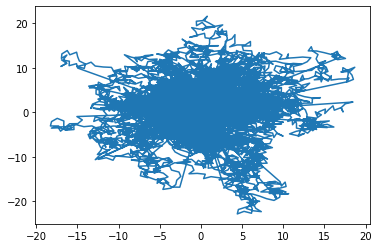

In [ ]:

x,y=0,0
theta=0
CX,CY = np.cos(theta), np.cos(np.pi-theta)
step_size=1
n_steps=100
n_sims=100
walk = np.zeros((n_sims,n_steps+1,2))
np.random.seed(0)

for sim in range(n_sims):
  x,y=0,0
  theta0 = np.pi/2 #2*np.pi*np.random.uniform(low=0,high=1)

  # print('x0,y0',x,y)
  # print('theta0',180*theta/np.pi)

  CX,CY = np.cos(theta0), np.cos(np.pi/2-theta0)
  for step in range(n_steps+1):
    
    
    walk[sim,step,:] = x,y
    theta = 2*np.pi*np.random.uniform(low=0,high=1)
    if True:
      V1 = np.cos(theta)
      V2 = np.sin(theta)
      CA = CX*V1-CY*V2
      CB = CY*V1+CX*V2
      xn,yn = x+step_size*CA, y+step_size*CB

    if False:
      X,Y = np.arccos(CX), np.arccos(CY) # can't use this way: doesn't give back origial angles. can't distinguish X from -X
      CA = np.cos(X+theta)
      CB = np.cos(Y-theta)    

    x,y = xn,yn
    CX=CA
    CY=CB

plt.plot(walk[:,:,0].flatten(),walk[:,:,1].flatten())


### Note on `np.arccos`
Note that we have to take care with arccos, since it reflects angles after 180: they should actually be 360 deg minus the returned value.

In [ ]:
for deg in range(0,360+1):
  X=(deg)*np.pi/180
  Y=np.pi/2-X
  X*180/np.pi, Y*180/np.pi, (X+Y)
  CX = np.cos(X)
  deg_ = np.arccos(CX)*180/np.pi
  print(np.isclose(deg,deg_),deg,deg_,360-deg_,CX)

True 0 0.0 360.0 1.0
True 1 0.9999999999999002 359.0000000000001 0.9998476951563913
True 2 1.9999999999999472 358.00000000000006 0.9993908270190958
True 3 3.000000000000045 356.99999999999994 0.9986295347545738
True 4 4.000000000000041 355.99999999999994 0.9975640502598242
True 5 4.999999999999992 355.0 0.9961946980917455
True 6 6.000000000000026 354.0 0.9945218953682733
True 7 7.000000000000025 353.0 0.992546151641322
True 8 7.9999999999999805 352.0 0.9902680687415704
True 9 8.999999999999984 351.0 0.9876883405951378
True 10 10.000000000000012 350.0 0.984807753012208
True 11 10.999999999999995 349.0 0.981627183447664
True 12 11.999999999999986 348.0 0.9781476007338057
True 13 12.999999999999996 347.0 0.9743700647852352
True 14 14.0 346.0 0.9702957262759965
True 15 14.999999999999996 345.0 0.9659258262890683
True 16 15.999999999999993 344.0 0.9612616959383189
True 17 17.000000000000007 343.0 0.9563047559630354
True 18 18.00000000000001 342.0 0.9510565162951535
True 19 18.99999999999999

# Single Scattering Model
* Chapter 3 "The Single Scattering Model" in Joy, 1995

In [ ]:
def comp_alpha(Z,E):
  alpha = 3.4e-3*Z**0.67/E
  return(alpha)

def comp_mean_free_path(Z,E,A,p):
  '''
  Eq 3.3 in Joy, 1995
  Z: atomic number (gold 79)
  E: energy in kev (100 for 100 kev)
  A: g/mol (gold is 196.96657)
  p: g/cm3 (gold is 19.3)

  '''
  alpha = comp_alpha(Z,E)
  sigma_E = 5.21e2*4*np.pi/(alpha*(1+alpha))*(Z*(E+511)/(E*(E+1024)))**2 # cm2/atom e23 (ie normally 5.21e-21), with relativistic correction a la Joy, 1995, p. 38
  N_a = 6.02214076
  lam = A/(N_a*p*sigma_E)*1e8 # 1e8 for cm to A conversion
  return(lam)

lam = comp_mean_free_path(Z=79,E=100,A=196.96657,p=19.3)

def comp_step_length(lam):
  '''
  Eq 3.7 in Joy, 1995
  '''
  s = -lam*np.log(np.random.uniform(low=0,high=1))
  return(s)

def comp_scattering_angles(Z,E):
  alpha = comp_alpha(Z,E)
  rnd1,rnd2 = np.random.uniform(low=0,high=1,size=2)
  Cphi = 1-2*alpha*rnd1/(1+alpha-rnd1)
  phi = np.arccos(Cphi) # safe because phi in [0,180]
  psi = 2*np.pi*rnd2
  return(phi,psi)

n_sims=int(1e6)
phis = np.zeros(n_sims)
for sim in range(n_sims):
  phis[sim] = comp_scattering_angles(Z=79,E=100)[0]*180/np.pi



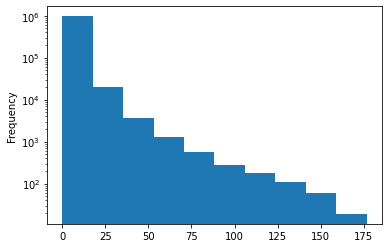

In [3]:
pd.Series(phis).plot.hist(logy=True)

In [4]:
def comp_cos(phi,psi,CX,CY,CZ):
  '''
  where CX**2+CY**2+CZ**2 = 1 = CA**2+CB**2+CC**2
  '''

  Cphi = np.cos(phi)
  Sphi = np.sin(phi)
  Cpsi = np.cos(psi)
  Spsi = np.sin(psi)

  AM = -(CX/CZ)
  AN = 1/np.sqrt(1+AM*AM)
  V1 = AN*Sphi
  V2 = AN*AM*Sphi
  V3 = Cpsi
  V4 = Spsi
  CA = CX*Cphi+V1*V3+CY*V2*V4
  CB = CY*Cphi+V4*(CZ*V1-CX*V2)
  CC = CZ*Cphi + V2*V3 - CY*V1*V4

  return(CA,CB,CC)


phi,psi = 45*np.pi/180, 0*np.pi/180 # 1 deg
CX,CY = .0,.0 # initial velocity
CZ = np.sqrt(1-CX**2-CY**2)
comp_cos(phi,psi,CX,CY,CZ), (np.array(comp_cos(phi,psi,CX,CY,CZ))**2).sum()


((0.7071067811865475, 0.0, 0.7071067811865476), 1.0)

We can check that $cx^2+cy^2+cz^2 = 1 = ca^2 + cb^2 + cc^2$ for all angles $\phi, \psi$

Small angle scattering dominates, with larger scattering angles extremely rare. Backscattering over 90 deg (in one shot) is ~0.6%. However the random walk of a trajector is cumulative: from one event to the next there is usually small deviatoins, but eventually these build up and are larger than 90 deg in the z direction and are "backscattered".

In [5]:
Z=79
A=196.96657
E=100
def comp_J(Z):
  '''
  mean ionization potential.
  measured values are avilable. see Table 3.2, p 33 in Joy, 1995  
  can also calculate with average Z 
  better to use average values for elements with low atomic number 
    element | atomic number| measured | computed
    C | 6| 0.0780 |  0.100
    Au | 79 | 0.790 | 0.797
  "effective average energy loss per interaction between the incident electron andthe solid"
  "incorporates into its value all possible mechanisms for energy loss that the electron can encounter"
  '''
  J = (9.76*Z+58.5/Z**0.19)*1e-3 # in keV
  return(J)

def comp_dE_ds(Z,E,A):
  '''
  Eq 3.21 in Joy, 1995
  rate of energy loss
  depends on units of A
  '''

  J = comp_J(Z)
  dE_ds = 78500*Z/(A*E)*np.log(1.166*(E+0.85*J)/J) # units of 1/A (e.g. mol/g)
  return(dE_ds)

comp_dE_ds(Z,E,A)


1572.0385499326624

In [65]:


def comp_single_scatter_trajectory(Z,E,A,p,n_steps=2e5,E_cut=0.05):
  
  n_steps = int(n_steps)
  CX,CY,CZ = 0,0,1 # motion component
  Es = np.zeros(n_steps+1)
  rs = np.zeros((n_steps+1,3))

  Es[0] = E
  x,y,z=0,0,0
  rs[0] = x,y,z

  lam = comp_mean_free_path(Z=Z,E=E,A=A,p=p)
  step_size0 = comp_step_length(lam) # Eq 3.7
  x+=step_size0*CX
  y+=step_size0*CY
  z+=step_size0*CZ

  dE_ds = comp_dE_ds(Z,E,A)
  E -= step_size0*p*dE_ds*1e-8 # 1e-8 for cm to A
  Es[1] = E
  rs[1] = x,y,z
  
  for step in range(2,n_steps+1):

    lam = comp_mean_free_path(Z=Z,E=E,A=A,p=p)
    step_size = comp_step_length(lam)
    phi,psi = comp_scattering_angles(Z=Z,E=E)
    CA,CB,CC = comp_cos(phi,psi,CX,CY,CZ)
    xn=x+step_size*CA
    yn=y+step_size*CB
    zn=z+step_size*CC
    dE_ds = comp_dE_ds(Z,E,A)
    E_ = E-step_size*p*dE_ds*1e-8 # 1e-8 for cm to A

    x,y,z = xn,yn,zn
    CX,CY,CZ = CA,CB,CC
    E = E_

    rs[step,:] = x,y,z
    Es[step] = E

    if E < E_cut or zn < 0:
      break

  Es[step+1:] = np.nan # zero
  rs[step+1:] = np.nan # zero
  return(rs,Es)



## Gold

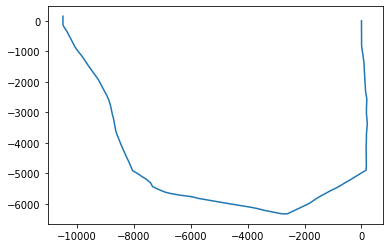

In [72]:
p=19.3 # g/cm3
Z=79
A=196.96657 # g/mol
E=100
rs,Es = comp_single_scatter_trajectory(Z,E,A,p,n_steps=2e5,E_cut=0.05)
plt.plot(rs[:,0],-rs[:,-1])

This is the trajectory of one electron in Gold

Note that the electron can "escape" out of the top. In order to know what happens after, we would have to model their path through the vacuum to the next things they interacted with. This is hard to model because it involves the geometry and materials of the inside of the scope. This suggests that experimentally, electrons can jump out of the detector and sometimes re-interact with it or be absorbed into some other part of the scope.

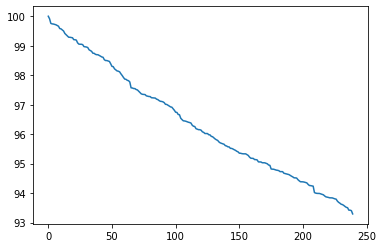

In [73]:
pd.Series(Es).plot()

As the energy decreases through interactions, the electron looses more energy each step. With less energy, the mean free path is shorter and the electron takes smaller steps. We can truncate the simulation because the steps are smaller and smaller and won't change the final position much. 

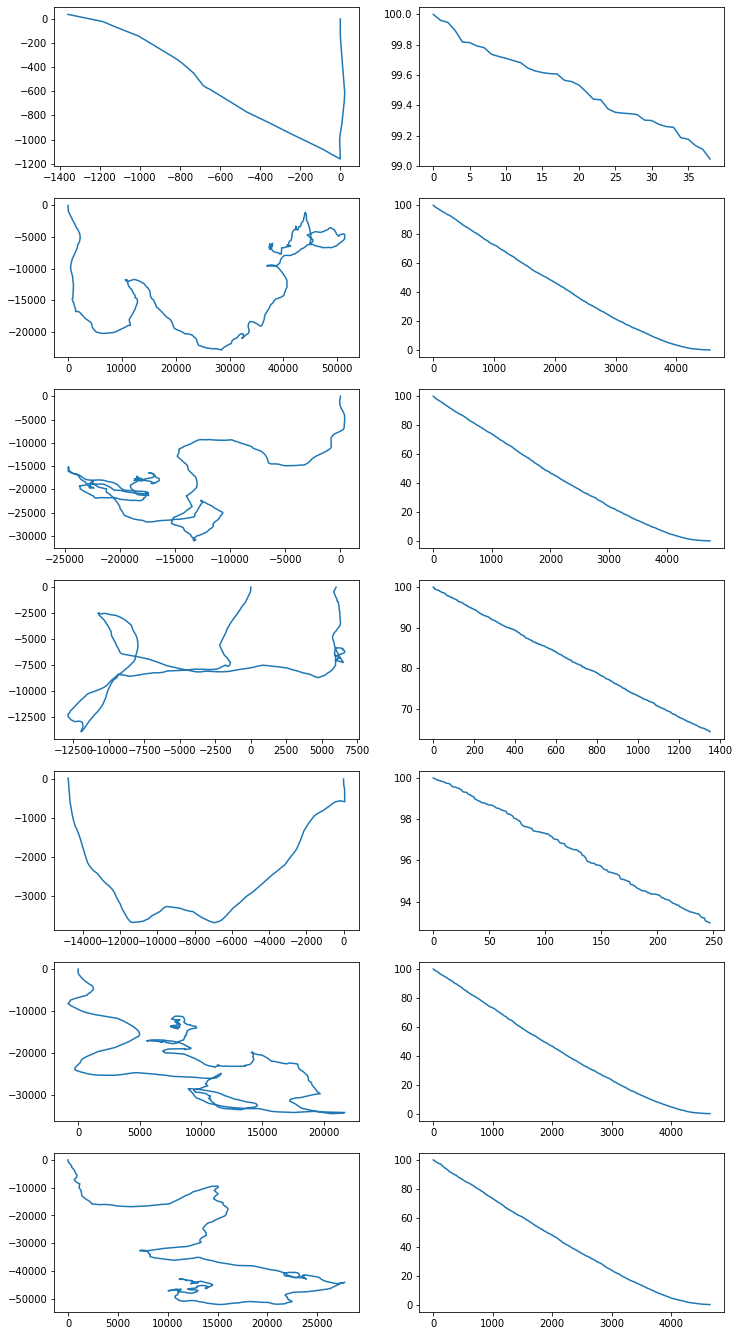

In [74]:
p=19.3 # g/cm3
Z=79
A=196.96657 # g/mol
E=100
fig,axes = plt.subplots(nrows=n_sims,ncols=2,figsize=(12,24))
for sim in range(n_sims):
  rs,Es = comp_single_scatter_trajectory(Z,E,A,p,n_steps=2e5,E_cut=0.05)
  axes[sim,0].plot(rs[:,0],-rs[:,-1])
  pd.Series(Es).plot(ax=axes[sim,1])

In order to get a sense of how many electron backscatter, we have to run sufficient simulations to get statistics

In [79]:
n_sims=100
back_scatter_count=0
for sim in range(n_sims):
  rs,Es = comp_single_scatter_trajectory(Z,E,A,p,n_steps=2e5,E_cut=0.05)
  if np.nanmin(Es) > 0.05: 
    back_scatter_count += 1

back_scatter_count/n_sims


0.52

## Silicon
But we don't make detectors out of gold, but something softer like silicon. Here we see backscattering less.

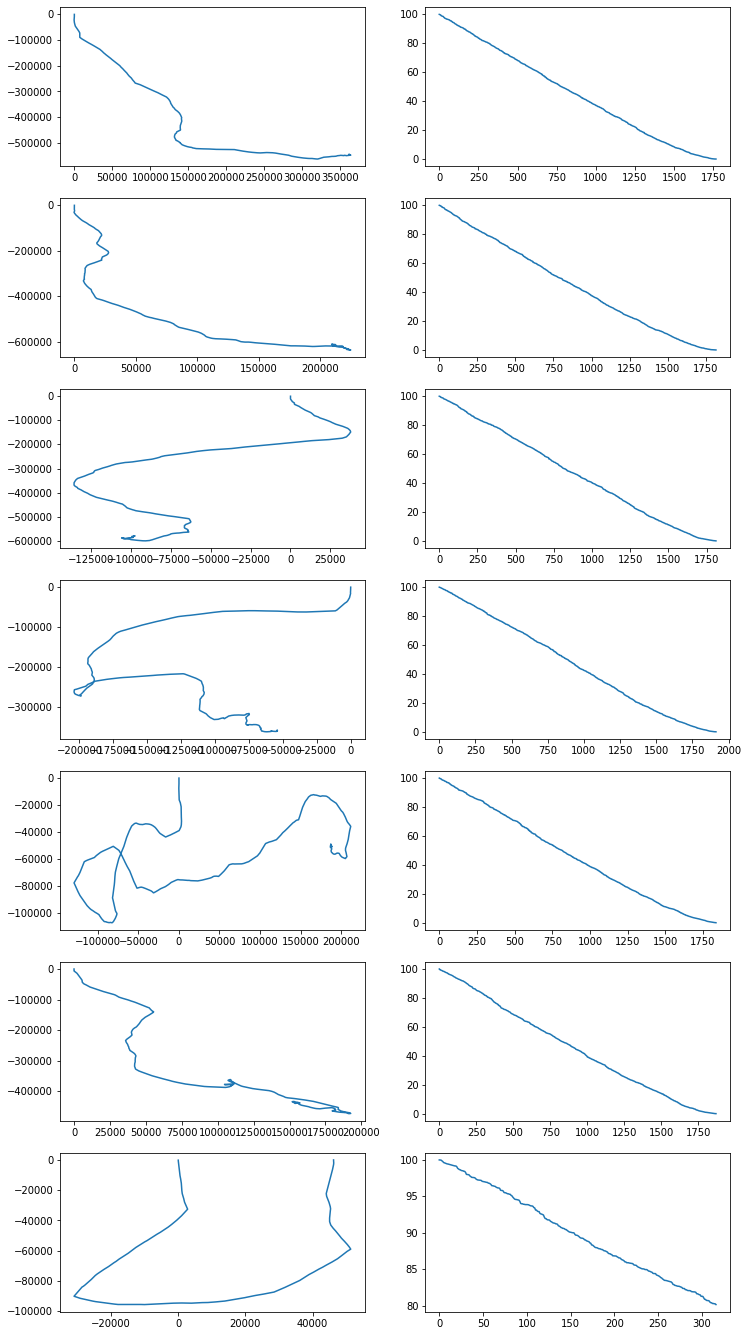

In [70]:
p=2.33
A=28.0855
Z=14
E=100
n_sims=7
fig,axes = plt.subplots(nrows=n_sims,ncols=2,figsize=(12,24))
for sim in range(n_sims):
  rs,Es = comp_single_scatter_trajectory(Z,E,A,p,n_steps=2e5,E_cut=0.05)
  axes[sim,0].plot(rs[:,0],-rs[:,-1])
  pd.Series(Es).plot(ax=axes[sim,1])

In [80]:
p=2.33
A=28.0855
Z=14
E=100

n_sims=100
back_scatter_count=0
for sim in range(n_sims):
  rs,Es = comp_single_scatter_trajectory(Z,E,A,p,n_steps=2e5,E_cut=0.05)
  if np.nanmin(Es) > 0.05: 
    back_scatter_count += 1

back_scatter_count/n_sims


0.21

Si backscatters ~21%, vs ~52% Gold